In this file, we downlaod the dataset using wget, I used a colab notebook for this.
We then look at the folder structure, type of data present, type of anomalies and so on.

Look at the Dataset

In [2]:
!wget -O carpet.tar.xz "https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937484-1629951672/carpet.tar.xz"



--2025-07-10 08:22:49--  https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937484-1629951672/carpet.tar.xz
Resolving www.mydrive.ch (www.mydrive.ch)... 91.214.169.64
Connecting to www.mydrive.ch (www.mydrive.ch)|91.214.169.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 740285760 (706M) [application/x-xz]
Saving to: ‘carpet.tar.xz’

carpet.tar.xz       100%[===================>] 705.99M  78.0MB/s    in 11s     

2025-07-10 08:23:00 (64.0 MB/s) - ‘carpet.tar.xz’ saved [740285760/740285760]



In [3]:
!mkdir -p mvtec/carpet
!tar -xf carpet.tar.xz -C mvtec/carpet


In [4]:
!ls

carpet.tar.xz  mvtec  sample_data


In [10]:
!ls mvtec/carpet

carpet


In [12]:
!mv mvtec/carpet/carpet/* mvtec/carpet

In [13]:
!ls mvtec/carpet

carpet	ground_truth  license.txt  readme.txt  test  train


In [15]:
!rmdir mvtec/carpet/carpet

In [16]:
!cat mvtec/carpet/readme.txt

Attribution
-----------
If you use the dataset in scientific work, please cite:

Paul Bergmann, Michael Fauser, David Sattlegger, and Carsten Steger,
"A Comprehensive Real-World Dataset for Unsupervised Anomaly Detection",
IEEE Conference on Computer Vision and Pattern Recognition, 2019


License
-------
Copyright 2019 MVTec Software GmbH

This work is licensed under a Creative Commons 
Attribution-NonCommercial-ShareAlike 4.0 International License.

You should have received a copy of the license along with this work.
If not, see <http://creativecommons.org/licenses/by-nc-sa/4.0/>.

For using the data in a way that falls under the commercial use clause
of the license, please contact us.


Contact
-------
If you have any questions or comments about the dataset, feel free to
contact us via: paul.bergmann@mvtec.com, fauser@mvtec.com,
sattlegger@mvtec.com, steger@mvtec.com

In [19]:
!ls mvtec/carpet/ground_truth

color  cut  hole  metal_contamination  thread


In [18]:
!ls mvtec/carpet/ground_truth/color

000_mask.png  004_mask.png  008_mask.png  012_mask.png	016_mask.png
001_mask.png  005_mask.png  009_mask.png  013_mask.png	017_mask.png
002_mask.png  006_mask.png  010_mask.png  014_mask.png	018_mask.png
003_mask.png  007_mask.png  011_mask.png  015_mask.png


In [20]:
!ls mvtec/carpet/ground_truth/cut

000_mask.png  004_mask.png  008_mask.png  012_mask.png	016_mask.png
001_mask.png  005_mask.png  009_mask.png  013_mask.png
002_mask.png  006_mask.png  010_mask.png  014_mask.png
003_mask.png  007_mask.png  011_mask.png  015_mask.png


In [21]:
!ls mvtec/carpet/ground_truth/hole

000_mask.png  004_mask.png  008_mask.png  012_mask.png	016_mask.png
001_mask.png  005_mask.png  009_mask.png  013_mask.png
002_mask.png  006_mask.png  010_mask.png  014_mask.png
003_mask.png  007_mask.png  011_mask.png  015_mask.png


In [22]:
!ls mvtec/carpet/train

good


In [23]:
!ls mvtec/carpet/train/good # has only normal images without defects, no labels or masks

000.png  032.png  064.png  096.png  128.png  160.png  192.png  224.png	256.png
001.png  033.png  065.png  097.png  129.png  161.png  193.png  225.png	257.png
002.png  034.png  066.png  098.png  130.png  162.png  194.png  226.png	258.png
003.png  035.png  067.png  099.png  131.png  163.png  195.png  227.png	259.png
004.png  036.png  068.png  100.png  132.png  164.png  196.png  228.png	260.png
005.png  037.png  069.png  101.png  133.png  165.png  197.png  229.png	261.png
006.png  038.png  070.png  102.png  134.png  166.png  198.png  230.png	262.png
007.png  039.png  071.png  103.png  135.png  167.png  199.png  231.png	263.png
008.png  040.png  072.png  104.png  136.png  168.png  200.png  232.png	264.png
009.png  041.png  073.png  105.png  137.png  169.png  201.png  233.png	265.png
010.png  042.png  074.png  106.png  138.png  170.png  202.png  234.png	266.png
011.png  043.png  075.png  107.png  139.png  171.png  203.png  235.png	267.png
012.png  044.png  076.png  108.png  140.png  172.png

In [29]:
!ls mvtec/carpet/test # has both defetive and normal images
!ls mvtec/carpet/test/color

color  cut  good  hole	metal_contamination  thread
000.png  003.png  006.png  009.png  012.png  015.png  018.png
001.png  004.png  007.png  010.png  013.png  016.png
002.png  005.png  008.png  011.png  014.png  017.png


(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

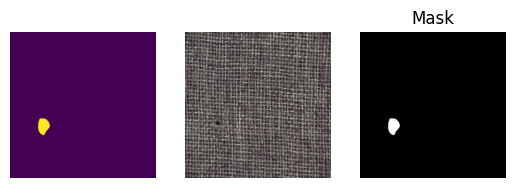

In [37]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = "mvtec/carpet/ground_truth/hole/001_mask.png"

img = Image.open(img_path)
img2 = Image.open("mvtec/carpet/test/hole/001.png")

plt.subplot(1,3,1)
plt.imshow(img)
plt.axis('off')
plt.title("")


plt.subplot(1,3,2)
plt.imshow(img2)
plt.axis('off')
plt.title("")

plt.subplot(1, 3, 3)
plt.imshow(img, cmap='gray')
plt.title("Mask")
plt.axis('off')


Text(0.5, 1.0, '')

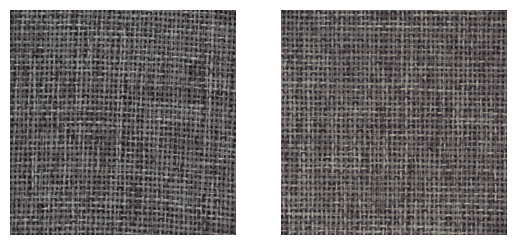

In [38]:
img_train = Image.open("mvtec/carpet/train/good/000.png")
img_test = Image.open("mvtec/carpet/test/good/000.png")

plt.subplot(1,2,1)
plt.imshow(img_train)
plt.axis('off')
plt.title("")
plt.subplot(1,2,2)
plt.imshow(img_test)
plt.axis('off')
plt.title("")

As observered,
- every image that is like ground_truth/{defect_name}/{img_number}_mask.png has a corresponding test/{defect_name}/{img_number}.png that represents the real image
- The defects represent binary segmentation masks
- The train/ only has good/ that is images without any defects, and the test also contains good/ that have no defects, they are to have normality, train models on what normal data is like, and the good/ in test help us make sure that we have sample for false positives, images without any defects

In [39]:
!pwd

/content


showing comparision mask vs ground truth for color


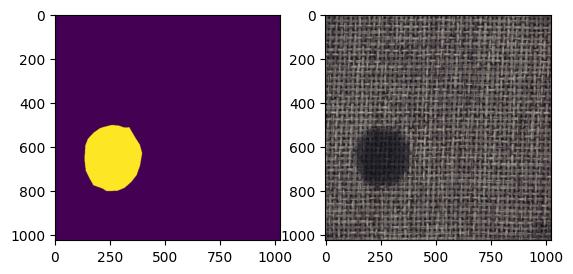

showing comparision mask vs ground truth for cut


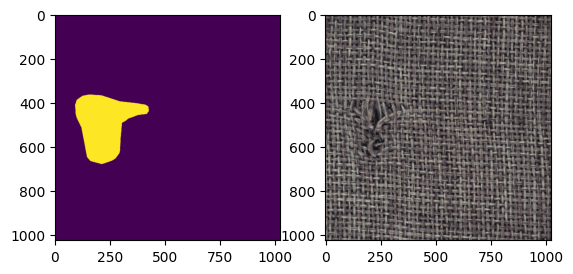

showing comparision mask vs ground truth for hole


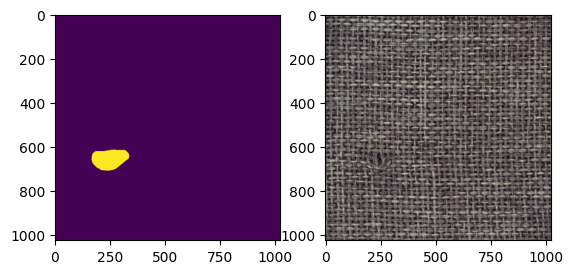

showing comparision mask vs ground truth for metal_contamination


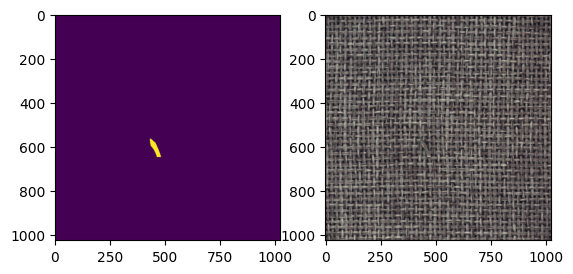

showing comparision mask vs ground truth for thread


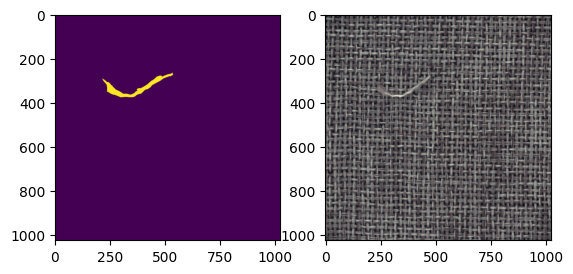

In [40]:
defects = ["color", "cut", "hole", "metal_contamination", "thread"]
for defect in defects:
  print(f"showing comparision mask vs ground truth for {defect}")
  mask_image = Image.open(f"mvtec/carpet/ground_truth/{defect}/000_mask.png")
  plt.subplot(1,2,1)
  plt.imshow(mask_image)
  gt_image = Image.open(f"mvtec/carpet/test/{defect}/000.png")
  plt.subplot(1,2,2)
  plt.imshow(gt_image)
  plt.show()

In [42]:
import os

ground_truth = "mvtec/carpet/ground_truth"

for defect in defects:
    path = os.path.join(ground_truth, defect)
    if os.path.isdir(path):
        count = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
        print(f"{defect}: {count} files")



color: 19 files
cut: 17 files
hole: 17 files
metal_contamination: 17 files
thread: 19 files


In [46]:
# for normal images, 280 train 28 test, so 10:1 ratio,
good_test = "mvtec/carpet/test/good"
good_train = "mvtec/carpet/train/good"

print("normal files in test " ,len([f for f in os.listdir(good_test)]))
print("normal files in train " ,len([f for f in os.listdir(good_train)]))
print(2800/308)


normal files in test  28
normal files in train  280
9.090909090909092


In [48]:
from PIL import Image
img_real = Image.open("mvtec/carpet/test/hole/001.png")
img_mask = Image.open("mvtec/carpet/ground_truth/hole/001_mask.png")

width, height = img.size
num_pixels = width * height # approx a million pixels

print("for real image:")
print(f"Image size: {width} x {height}")
print(f"Total pixels: {num_pixels}")
print(f"Image mode: {img_real.mode}") # 3 channels, rgb
width, height = img_mask.size
num_pixels = width * height

print(f"for mask:")
print(f"Image size: {width} x {height}")
print(f"Total pixels: {num_pixels}")
print(f"Image mode: {img_mask.mode}") # 1 channel


for real image:
Image size: 1024 x 1024
Total pixels: 1048576
Image mode: RGB
for mask:
Image size: 1024 x 1024
Total pixels: 1048576
Image mode: L


Seems very high dimensional to try out classical ML like PCA

In [52]:
print(img_real.size)
print(type(img_real))

(1024, 1024)
<class 'PIL.PngImagePlugin.PngImageFile'>


In [53]:
from torchvision.transforms import transforms
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor() # pixel values 0,255 to 0,1
])

# pil image object
image = transform(img_real)

print(image.shape)
print(type(image))

torch.Size([3, 224, 224])
<class 'torch.Tensor'>


In [54]:
print(image)

tensor([[[0.1804, 0.1725, 0.2392,  ..., 0.2863, 0.2588, 0.3176],
         [0.1255, 0.1020, 0.1882,  ..., 0.2275, 0.2157, 0.3098],
         [0.1373, 0.0902, 0.1373,  ..., 0.2196, 0.1804, 0.2941],
         ...,
         [0.2941, 0.1529, 0.2588,  ..., 0.4000, 0.4431, 0.4275],
         [0.2314, 0.1098, 0.2118,  ..., 0.3333, 0.4039, 0.4039],
         [0.3059, 0.1961, 0.2471,  ..., 0.2667, 0.3725, 0.3529]],

        [[0.1490, 0.1490, 0.2118,  ..., 0.2392, 0.2275, 0.2863],
         [0.1176, 0.0941, 0.1686,  ..., 0.1882, 0.1804, 0.2745],
         [0.1333, 0.0980, 0.1333,  ..., 0.1961, 0.1569, 0.2627],
         ...,
         [0.2745, 0.1569, 0.2549,  ..., 0.3804, 0.4235, 0.3961],
         [0.2157, 0.1098, 0.2078,  ..., 0.3059, 0.3765, 0.3765],
         [0.2824, 0.1765, 0.2314,  ..., 0.2549, 0.3569, 0.3490]],

        [[0.1725, 0.1725, 0.2235,  ..., 0.2471, 0.2353, 0.2824],
         [0.1412, 0.1216, 0.1922,  ..., 0.2039, 0.1922, 0.2745],
         [0.1529, 0.1255, 0.1569,  ..., 0.2157, 0.1686, 0.

In [56]:
image.permute(1,2,0).shape # 3, 224, 224 to 224, 224, 3, ie c,h,w to h,w,c

torch.Size([224, 224, 3])

In [57]:
image.dtype

torch.float32

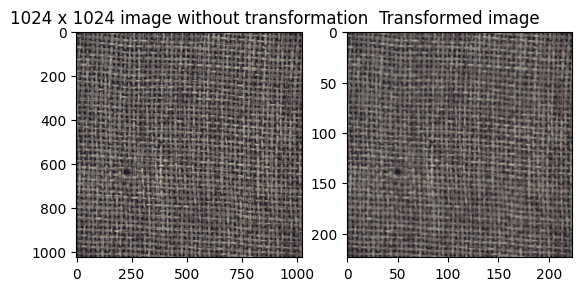

In [60]:
# imshow knows that its float32 values so the values must be between 0 and 1
plt.subplot(1,2,1)
plt.imshow(img_real)
plt.title("1024 x 1024 image without transformation")
plt.subplot(1,2,2)
plt.imshow(image.permute(1,2,0))
plt.title("Transformed image")
plt.show()

In [61]:
memory_usage = image.numel() * image.element_size() # numel c*h*w
print(f"Memory usage of the tensor: {memory_usage * 280//1024} KB") # total memory use for 280 normal images in train/good

Memory usage of the tensor: 164640 KB


In [63]:
image.element_size() # 4 bytes , float32 dtype

4

below code is a wrong calculation, its only the python object overhead not how much the object actually occupies

In [78]:
import sys

print(f"Size of image object in memory full dataset: {sys.getsizeof(img_real)*280//1024} KB") # including metadata
print(f"Size of transformed tensor in memory full dataset: {sys.getsizeof(image) * 280//1024} KB")


Size of image object in memory full dataset: 15 KB
Size of transformed tensor in memory full dataset: 24 KB


In [75]:
# one pixel is one byte
print(1024*3*280, " KB")

860160  KB


In [76]:
print(224/1024)

0.21875


In [77]:
print(164540/860160)

0.1912899925595238


Apprixmately 20% times the original to deal with the transformed images